# SQL ALCHEMY HOMEWORK

In [1]:

# dependencies
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
session = Session(engine)
inspector = inspect(engine)

In [7]:
inspector.get_table_names()

['measurement', 'station']

In [8]:
columns_m = inspector.get_columns('measurement')
for c in columns_m:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns_s = inspector.get_columns('station')
for c in columns_s:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [11]:
measurement = Base.classes.measurement
station = Base.classes.station

# First Phase: Precipitation Analysis

*Design a query to retrieve the last 12 months of precipitation data and plot the results

*'Newest' Date is 8-23-17

In [12]:
# Calculate the date 1 year ago from today, cant use this though because the data is too old...
last_year = (dt.date.today() - dt.timedelta(days=365))
             
# Perform a query to retrieve the data and precipitation scores
date = []
precip = []
for row in session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2016-08-23', '2017-08-23')).all():
    date.append(row[0])
    precip.append(row[1])

# Save the query results as a Pandas DataFrame and set the index to the date column, and sort by date
precip_df = pd.DataFrame({'Date': date,
                          'Precipitation': precip
                         })
precip_df.set_index('Date').sort_values(by=['Date'], ascending=False).head(3)

,Precipitation
Date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00


<IPython.core.display.Javascript object>


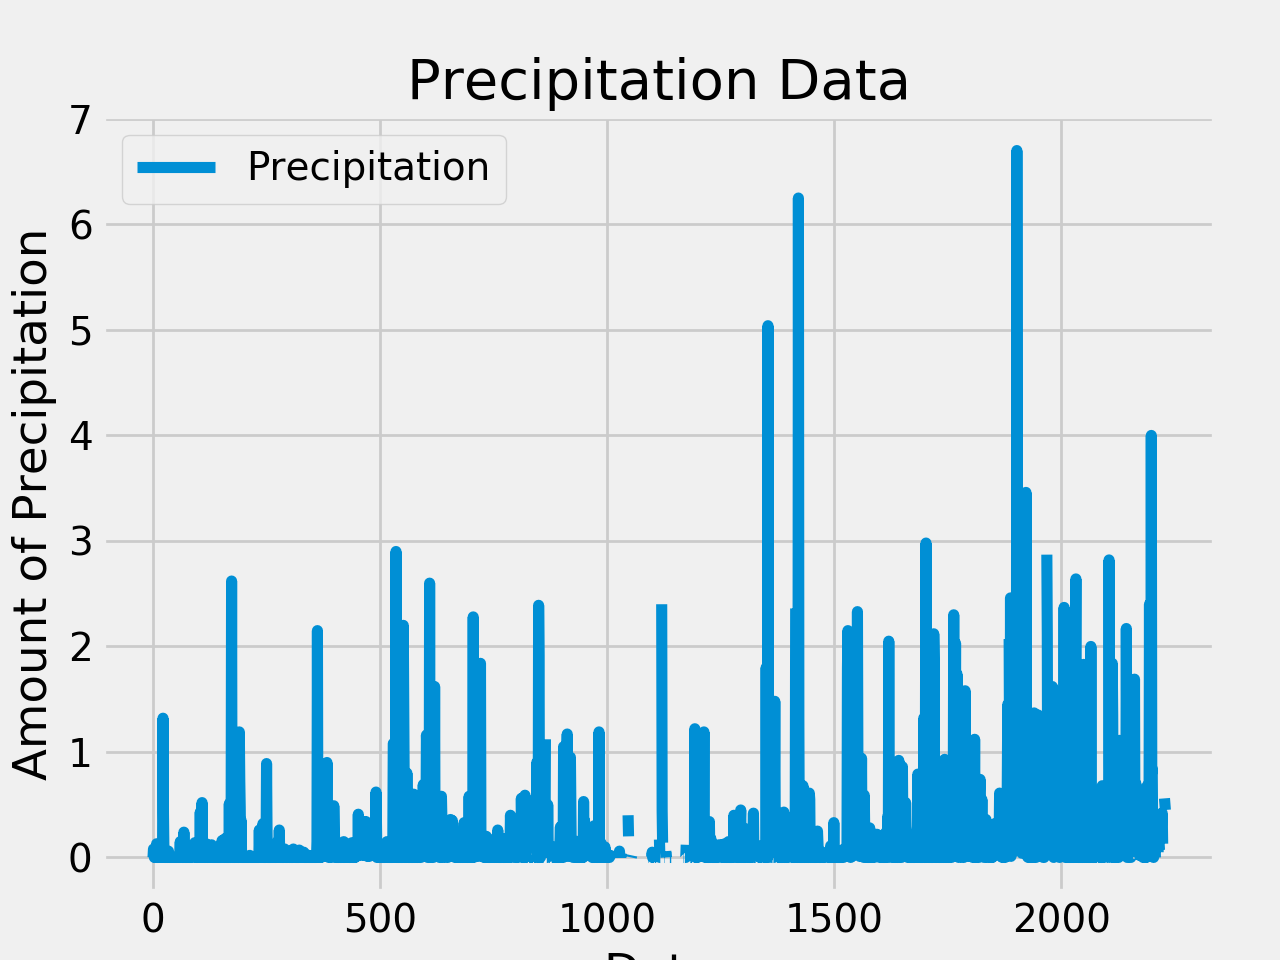

In [13]:

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.ylabel('Amount of Precipitation')
plt.xlabel('Date')
plt.title('Precipitation Data')
plt.show()

# Second Phase:Station Analysis 

In [14]:
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:

# How many stations are available in this dataset?
uni_stations = session.query(station.id).distinct().count()
print(f"There are {uni_stations} Stations in the dataset")

There are 9 Stations in the dataset


In [16]:

# What are the most active stations?  List the stations and the counts in descending order
engine.execute('SELECT m.station, count(m.id) FROM measurement m GROUP BY m.station ORDER BY 2 DESC').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature most active station
temps = session.query(measurement.station, func.max(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f'For Station {temps[0][0]} the highest temp recorded was {temps[0][1]} degrees, the lowest temp recorded was {temps[0][2]} degrees, and the average temp was {round(temps[0][3])}.')

For Station USC00519281 the highest temp recorded was 85.0 degrees, the lowest temp recorded was 54.0 degrees, and the average temp was 72.


In [18]:

# Choose the station with the highest number of temperature observations.
highest_obs = session.query(measurement.station, measurement.tobs).filter(measurement.date >= '2016-08-23').filter(measurement.station == 'USC00519281').all()
obs_df = pd.DataFrame(highest_obs)
obs_df.head(3)

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0


<IPython.core.display.Javascript object>


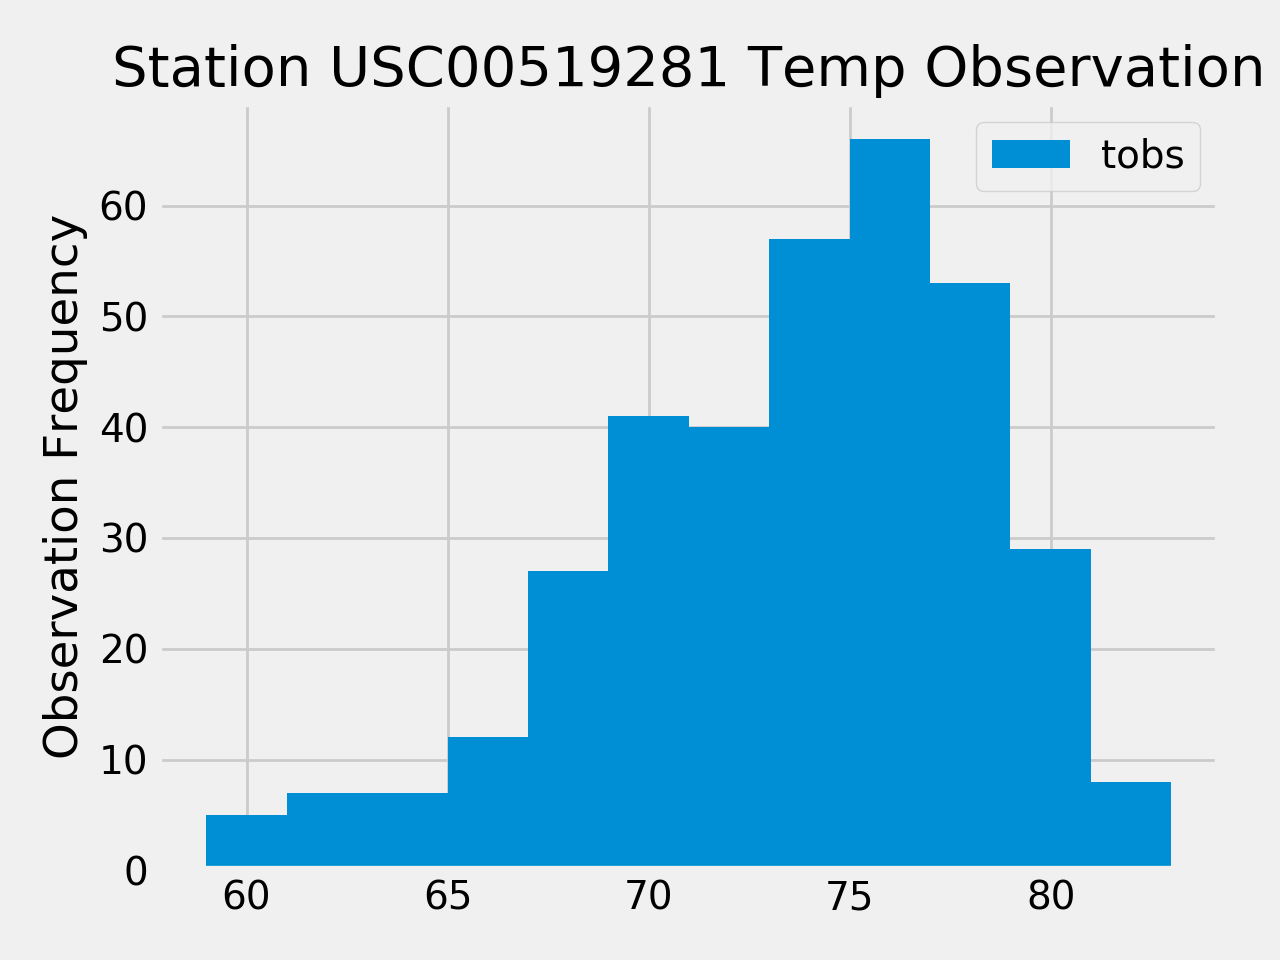

In [20]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obs_df.plot.hist(bins=12)
plt.ylabel("Observation Frequency")
plt.title("Station USC00519281 Temp Observation")
plt.tight_layout()
plt.show()